<a href="https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/01.introduction/b.preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing values

In [1]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
import numpy as np

!pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 82 kB 310 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load the dataset

In [2]:
dataset_to_use = 'A'
mydatasets_folder = "https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/"
filename = "df."+ dataset_to_use+"_2.with_missing_values.csv"
complete_name = mydatasets_folder+filename
!wget $complete_name

--2022-01-07 17:47:03--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/df.A_2.with_missing_values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316097 (309K) [text/plain]
Saving to: ‘df.A_2.with_missing_values.csv’

df.A_2.with_missing 100%[===================>] 308.69K  --.-KB/s    in 0.03s   

2022-01-07 17:47:03 (9.40 MB/s) - ‘df.A_2.with_missing_values.csv’ saved [316097/316097]



In [3]:
df = pd.read_csv('df.'+dataset_to_use+'_2.with_missing_values.csv')
df

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,IPSrc1,IPDst1,Protocol1,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,IPSrc2,IPDst2,Protocol2,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,IPSrc3,IPDst3,Protocol3,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,IPSrc4,IPDst4,Protocol4,PacketsSent4,PacketsReceived4,BytesSent4,BytesReceived4,...,IPDst23,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,IPSrc24,IPDst24,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,IPSrc25,IPDst25,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,BufferValid,KBytesReceived,label,Resolution,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
0,6.1,29,57,2372.0,79344,192.168.1.190,173.194.55.23,QUIC,29,57,2372,79344,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,172.217.6.225,0,0,0,0,0,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.12.174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1520324868397,1520324862555,0.008,861.841,4.454,0.005177,True,79.344,q480p,480,4.373793,3.401197,4.060443,7.771910,11.281561,0.005164
1,5.8,7,39,625.0,52973,192.168.1.190,74.125.155.199,QUIC,4,36,384,50112,192.168.1.190,172.217.11.33,QUIC,2,2,159,1469,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.11.14,0,0,0,0,0,192.168.1.190,172.217.12.206,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1521147321127,1521147316421,0.007,817.841,3.955,0.004844,True,52.973,q360p,360,3.969782,2.079442,3.688879,6.439350,10.877557,0.004833
2,7.3,16,23,1056.0,34178,192.168.1.190,74.125.155.201,TCP,16,23,1056,34178,192.168.1.190,172.217.11.1,0,0,0,0,0,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,216.58.219.206,0,0,0,0,0,192.168.1.190,216.58.217.99,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.190,0,0,0,0,0,0,192.168.1.190,0.0.0.0,0,0,0,0,0,0,0,1,0,1516218797937,1516218790859,0.004,623.401,3.417,0.005488,True,34.178,q720p,720,3.531582,2.833213,3.178054,6.963190,10.439367,0.005473
3,39.2,14,29,3377.0,36821,192.168.1.190,172.217.135.40,0,0,0,0,0,192.168.1.190,173.194.184.73,QUIC,11,28,2257,36767,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.12.206,QUIC,2,0,1054,0,192.168.1.190,172.217.11.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1521736968995,1521736937485,0.004,544.601,5.067,0.009311,True,36.821,q144p,144,3.606068,2.708050,3.401197,8.125039,10.513851,0.009268
4,4.6,9,77,900.0,104389,192.168.1.190,173.194.184.103,QUIC,9,77,900,104389,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,172.217.11.33,0,0,0,0,0,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.7.14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1521135591235,1521135586918,0.005,552.961,3.656,0.006621,True,104.389,q360p,360,4.648124,2.302585,4.356709,6.803505,11.555889,0.006599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,9.1,35,36,3312.0,33717,192.168.1.190,172.217.129.72,0,0,0,0,0,192.168.1.190,172.217.11.3,TCP,35,36,3312,33717,192.168.1.190,172.217.6.238,0,0,0,0,0,192.168.1.190,172.217.12.130,0,0,0,0,0,192.168.1.190,172.217.11.10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1520039448776,1520039440747,0.005,840.901,8.056,0.009586,True,33.717,q1080p,1080,3.518002,3.583519,3.610918,8.105609,10.425787,0.009540
288,7.0,12,38,1565.0,51602,192.168.1.190,74.125.155.235,QUIC,10,37,904,51504,192.168.1.190,172.217.11.3,TCP,1,0,583,0,192.168.1.190,172

Note that there are some "Not a number" (`NaN`). If the dataset is big, we need a systmatic way to detect missing values. The following [code](https://stackoverflow.com/a/37367344/2110769) gives the columns containing missing values.

What are the columns with NaN?

In [4]:
df.columns[df.isnull().any()].tolist()

['BytesSent', 'IPDst0']

How many NaNs do they have?

In [14]:
print("NaN of BytesSent = ", df['BytesSent'].isna().sum() )
print("NaN of IPDst0 = ", df['IPDst0'].isna().sum() )

NaN of BytesSent =  34
NaN of IPDst0 =  1


It may also be useful to visualize where missing values are

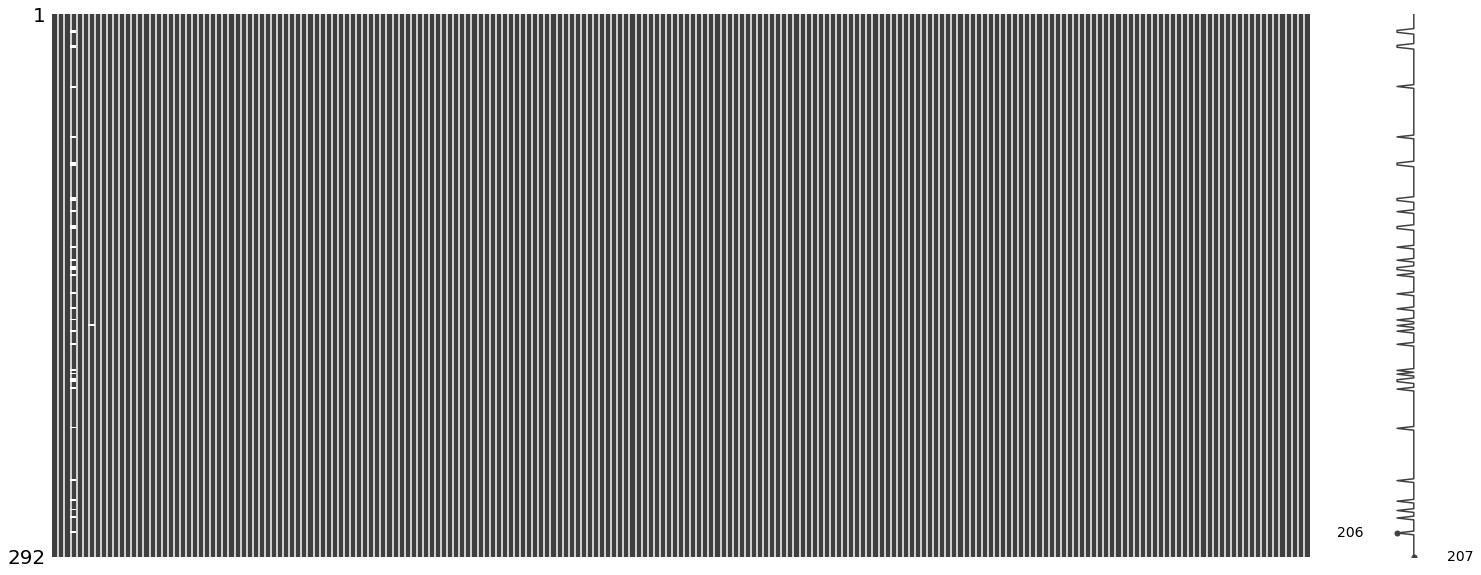

In [ ]:
msno.matrix(df)

What is the row with NaN in the IPDst0 column?

In [16]:
df[df['IPDst0'].isnull() ]

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,IPSrc1,IPDst1,Protocol1,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,IPSrc2,IPDst2,Protocol2,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,IPSrc3,IPDst3,Protocol3,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,IPSrc4,IPDst4,Protocol4,PacketsSent4,PacketsReceived4,BytesSent4,BytesReceived4,...,IPDst23,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,IPSrc24,IPDst24,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,IPSrc25,IPDst25,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,BufferValid,KBytesReceived,label,Resolution,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
167,3.1,0,24,0.0,14813,,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,24,0,14813,0,0,1,0,1521752100633,1521752097620,0.004,846.181,3.123,0.003695,True,14.813,q720p,720,2.695505,0.0,3.218876,0.0,9.603328,0.003689


## Strategy 1: remove columns with missing values

Just avoid using the columns that have missing values in your model

## Strategy 2: Remove rows with missing values
We can remove all the rows with missing values

In [ ]:
df_nonull = df.dropna()

[]

We can now train and test the model on this dataset

........

### Strategy 3: Remove some rows and some columns

We can remove the column with many missing values

In [18]:
df_cleaned = df.drop(columns=["BytesSent"])

... and then remove the samples with missing values in other columns

In [22]:
df_cleaned = df_cleaned.dropna()

## Strategy 4: Imputting

Filling missing values with other values.

* Fill with constant values

In [ ]:
df_inputted = df.copy()
df_inputted['BytesSent'] = df_inputted['BytesSent'].fillna(8)

You can now train and test the model on `df_inputted`

* Fill with dataset statistics

They must be computed on the training set only, in order to avoid **data leaks**.

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, 
                                     random_state=5)

mean_v = df_train['BytesSent'].mean()

df_inputted = df.copy()
df_inputted['BytesSent'] = df_inputted['BytesSent'].fillna(mean_v)

# Since the random seed is the same, the same samples will be in train and test
df_train_inputted, df_test_inputted = train_test_split(df, test_size=0.2, 
                                    shuffle=True, random_state=5)

Now you can train and test your model on the inputted dataset

# Categorical features

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 207 columns):
 #   Column               Dtype  
---  ------               -----  
 0   RelativeTime         float64
 1   PacketsSent          int64  
 2   PacketsReceived      int64  
 3   BytesSent            float64
 4   BytesReceived        int64  
 5   IPSrc0               object 
 6   IPDst0               object 
 7   Protocol0            object 
 8   PacketsSent0         int64  
 9   PacketsReceived0     int64  
 10  BytesSent0           int64  
 11  BytesReceived0       int64  
 12  IPSrc1               object 
 13  IPDst1               object 
 14  Protocol1            object 
 15  PacketsSent1         int64  
 16  PacketsReceived1     int64  
 17  BytesSent1           int64  
 18  BytesReceived1       int64  
 19  IPSrc2               object 
 20  IPDst2               object 
 21  Protocol2            object 
 22  PacketsSent2         int64  
 23  PacketsReceived2     int64  
 24  Bytes

Some interesting features are strings, but ML algorithms can only handle.

Let's check what are the values that `Protocol0` (The protocol used for connection 0, i.e., the most used connection)

In [ ]:
np.unique( df['Protocol0'] )

array(['0', 'QUIC', 'TCP', 'TLSv1.2', 'UDP'], dtype=object)

One solution is to to the following numerical mapping:
* 0 -> 0
* QUIC -> 1
* TCP -> 2
* TLSv1.2 -> 3
* UDP -> 4

The problem with this is that our model will be trained assuming **ordering**
* UDP > TLSv.1.2 > TCP > QUIC > 0

This would be an error. We need to resort to **One-Hot Encoding** to avoid any 
implicit ordering

In [ ]:
encoder = ce.OneHotEncoder(cols=['Protocol0'], use_cat_names=True)
df_encoded = encoder.fit_transform(df)
df_encoded.head()

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0_QUIC,Protocol0_TCP,Protocol0_0,Protocol0_TLSv1.2,Protocol0_UDP,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,IPSrc1,IPDst1,Protocol1,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,IPSrc2,IPDst2,Protocol2,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,IPSrc3,IPDst3,Protocol3,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,IPSrc4,IPDst4,Protocol4,...,IPDst23,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,IPSrc24,IPDst24,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,IPSrc25,IPDst25,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,BufferValid,KBytesReceived,label,Resolution,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
0,6.1,29,57,2372.0,79344,192.168.1.190,173.194.55.23,1,0,0,0,0,29,57,2372,79344,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,172.217.6.225,0,0,0,0,0,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.12.174,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1520324868397,1520324862555,0.008,861.841,4.454,0.005177,True,79.344,q480p,480,4.373793,3.401197,4.060443,7.771910,11.281561,0.005164
1,5.8,7,39,625.0,52973,192.168.1.190,74.125.155.199,1,0,0,0,0,4,36,384,50112,192.168.1.190,172.217.11.33,QUIC,2,2,159,1469,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.11.14,0,0,0,0,0,192.168.1.190,172.217.12.206,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1521147321127,1521147316421,0.007,817.841,3.955,0.004844,True,52.973,q360p,360,3.969782,2.079442,3.688879,6.439350,10.877557,0.004833
2,7.3,16,23,1056.0,34178,192.168.1.190,74.125.155.201,0,1,0,0,0,16,23,1056,34178,192.168.1.190,172.217.11.1,0,0,0,0,0,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,216.58.219.206,0,0,0,0,0,192.168.1.190,216.58.217.99,0,...,0,0,0,0,0,0,192.168.1.190,0,0,0,0,0,0,192.168.1.190,0.0.0.0,0,0,0,0,0,0,0,1,0,1516218797937,1516218790859,0.004,623.401,3.417,0.005488,True,34.178,q720p,720,3.531582,2.833213,3.178054,6.963190,10.439367,0.005473
3,39.2,14,29,3377.0,36821,192.168.1.190,172.217.135.40,0,0,1,0,0,0,0,0,0,192.168.1.190,173.194.184.73,QUIC,11,28,2257,36767,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.12.206,QUIC,2,0,1054,0,192.168.1.190,172.217.11.1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1521736968995,1521736937485,0.004,544.601,5.067,0.009311,True,36.821,q144p,144,3.606068,2.708050,3.401197,8.125039,10.513851,0.009268
4,4.6,9,77,900.0,104389,192.168.1.190,173.194.184.103,1,0,0,0,0,9,77,900,104389,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,172.217.11.33,0,0,0,0,0,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.7.14,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1521135591235,1521135586918,0.005,552.961,3.656,0.006621,True,104.389,q360p,360,4.648124,2.302585,4.356709,6.803505,11.555889,0.006599


Note that the column `Protocol0` has been replaced by multiple columns (one per each possible value). If a sample has `Protocol0=TCP`, you will find a `1` in `Protocol0_TCP`, otherwise `0`.

Now you can train and test the model on this modified dataset and include thos columns